In [2]:
import random
import feather
import os
import matplotlib.pyplot as plt
import subprocess
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime
import fontTools

In [3]:

import h5py
import numpy as np
import pandas as pd
from scipy.sparse import csc_matrix

def read_mapdb_h5(h5_path, otu_data=True, meta_data=True):
    """Example file: /mnt/mnemo3/janko/data/microbe_atlas/sruns-otus.97.otutable_plusMetaNoHeader_taxonomy_unmapped.h5"""
    f = h5py.File(h5_path, 'r')
    result_dict = {}

    # read otu data
    if otu_data:
        data_handle = f["otu_table"]
        col_ptr, nzvals, rowindices, otu_index, sample_index = [np.array(data_handle[sub_key]) for sub_key in ['data_colptr', 'data_nzval', 'data_rowval', 'oids', 'sids']]

        ## correct indexing (julia starts at 1)
        col_ptr -= 1
        rowindices -= 1

        otutable_sparse = csc_matrix((nzvals,rowindices,col_ptr), shape=(data_handle["m"][()],data_handle["n"][()]))
        result_dict["otu_data"] = {"otu_table": otutable_sparse, "otu_index": otu_index, "sample_index": sample_index}

    # read meta data
    if meta_data:
        meta_handle = f["meta_data"]
        result_dict["meta_data"] = {sub_key: pd.DataFrame(np.array(meta_handle[sub_key]).T) for sub_key in meta_handle.keys()}

    f.close()

    return result_dict



In [4]:
wgs=pd.read_csv("../tables_and_results/all_WGS_ribos.csv")

In [5]:
wgs_theta=pd.read_csv("../tables_and_results/WGS_ribo_trna.csv",sep="\t")

In [6]:
#select OTU level here: in This case 99%
#f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/hdf5/v0.2.2/metag_minfilter/samples-otus.99.metag.minfilter.remap.h5")

In [6]:
#select OTU level here: in This case 97, not filtered%
f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/hdf5/v0.2.2/samples-otus.97.mapped.remap.h5")

In [7]:
jankos_env=pd.read_csv("/mnt/mnemo4/microbeatlas/mapdata/20210104map1/samples.env.simple",sep="\t")

In [7]:
#jankos_env=pd.read_csv("/mnt/mnemo4/microbeatlas/mapdata/202/samples.env.janko",sep="\t")

In [8]:
keyw=f1["meta_data"]["keywords"]

In [9]:
keyw

,0,1,2,3,4,5,6,7,8
0,SRR7802516.SRS3751739,animal;human,infection,,"adenovirus,hbv,hepatitis,hepatocytes,human,inf...",,SRP160101,,
1,SRR6764573.SRS2992533,soil;field|plant;rhizosphere,,AMPLICON,"drought,dry,epicon,field,plant,root,sorghum",,SRP133339,,
2,SRR2093759.SRS984908,animal;mouse,gut;disease,AMPLICON,"antibiotic,cecum,disease,gastrointestinal trac...",,SRP060527,,42.2820973 -83.7338904
3,SRR618990.SRS375839,,,AMPLICON,hydrocarbon,,SRP017194,,
4,SRR961676.SRS475488,aquatic;marine,,WGS,"marine,oxygen,picoplankton,plankton,size-fract...",,SRP029388,,
...,...,...,...,...,...,...,...,...,...
2174187,SRR6323315.SRS2714555,animal|plant,gut,WGS,"alkaloid,antibiotic,bird,gastrointestinal trac...",,SRP125653,,
2174188,SRR1966467.SRS903103,animal,healthy;typhoid fever,WGS,"blood,healthy,typhoid fever",,SRP042645,,
2174189,SRR10912871.SRS6014526,,,AMPLICON,polar,,SRP242672,,39.3 139.65
2174190,SRR6054149.SRS2528061,,,WGS,pulsenet,,SRP040281,,


In [10]:
wgs=keyw[keyw[3]=="WGS"]

In [11]:
wgs

,0,1,2,3,4,5,6,7,8
4,SRR961676.SRS475488,aquatic;marine,,WGS,"marine,oxygen,picoplankton,plankton,size-fract...",,SRP029388,,
5,ERR1110441.ERS953889,,,WGS,"glycemic,nitrophenol,nutrition,personalized",,ERP012929,,
7,SRR2236892.SRS476520,animal,gut,WGS,"fiji,gastrointestinal tract",,SRP029441,,
10,ERR1217323.ERS822325,,,WGS,"beta-lactamase,carbapenemase,production",,ERP011196,,
15,ERR045661.ERS032653,,malaria,WGS,"cerebral,malaria,pathogenicity,virulence",,ERP000190,,
...,...,...,...,...,...,...,...,...,...
2174181,SRR6045873.SRS2521308,,,WGS,"mgit,raw",,SRP117784,,
2174182,ERR352773.ERS254185,,,WGS,"dissemination,drug,gonorrhea,resistance,spread",,ERP003278,,
2174187,SRR6323315.SRS2714555,animal|plant,gut,WGS,"alkaloid,antibiotic,bird,gastrointestinal trac...",,SRP125653,,
2174188,SRR1966467.SRS903103,animal,healthy;typhoid fever,WGS,"blood,healthy,typhoid fever",,SRP042645,,


In [11]:
for x in ["animal","soil","aquatic","plant"]:
    print(x +" found in "+str(len(wgs[wgs[1]==x]))+" samples")

animal found in 113622 samples
soil found in 2617 samples
aquatic found in 1827 samples
plant found in 4344 samples


In [78]:
for x in ["animal","soil","aquatic","plant"]:
    print(x +" found in "+str(len(keyw[keyw[1]==x]))+" samples")

animal found in 309685 samples
soil found in 76899 samples
aquatic found in 26344 samples
plant found in 32204 samples


In [12]:
wgs_theta

,ID,trna_nr,trna_start,trna_end,trna_type,codon,ins_start,ins_end,trna_confidence,psuedo,rnarobo_start,rnarobo_end,rnarobo_seq,trnaseq,ribozyme_control
0,ERR2597485.146554,1,140,204,Leu,CAA,0,0,28.0,pseudo,205,261,|GATAGTG|TAT|ATAAGTT|ACC|T|CC|ACGT|GGT|CACTATC...,GCGTGACAGGCCTAGCTCGTCAGTCTCATAAACTGAAGGTCTCTGG...,GATAGTGTATATAAGTTACCTCCACGTGGTCACTATCGGGTAATGC...
1,ERR2597485.147047,1,140,204,Leu,CAA,0,0,28.0,pseudo,205,261,|GATAGTG|TAT|ATAAGTT|ACC|T|CC|ACGT|GGT|CACTATC...,GCGTGACAGGCCTAGCTCGTCAGTCTCATAAACTGAAGGTCTCTGG...,GATAGTGTATATAAGTTACCTCCACGTGGTCACTATCGGGTAATGC...
2,ERR2597485.2163102,1,10,78,Met,CAT,0,0,47.9,NaN,80,134,|GAGATAC|A|ATCAATC|ACC|T|CC|ACGC|GGT|GTATCTT|G...,GCACTGGTGGAGCAAAGGTAGCTCACTAGCCTCATAAGCTAGAGAC...,GAGATACAATCAATCACCTCCACGCGGTGTATCTTGGGTAATGCTA...
3,ERR2597485.3043579,1,302,231,Leu,TAA,0,0,19.7,pseudo,227,173,|GAATAGC|AA|ATGAGAA|ACC|T|CC|ACGT|GGT|GCTATTC|...,CCCGAATTGGCATAGGAGATGGTCTTAAACACCATTTGGCATAAGC...,GAATAGCAAATGAGAAACCTCCACGTGGTGCTATTCGGATAACGCT...
4,ERR2597485.4358783,1,1,85,Leu,TAA,0,0,47.6,pseudo,86,140,|GAATAGC|AA|ATGAGAA|ACC|T|CC|ACGC|GGT|GCTATTC|...,GCCCCTTTATCCGAATTGGTATAGGAGATGGTCTTAAACACCATTC...,GAATAGCAAATGAGAAACCTCCACGCGGTGCTATTCGGGTAATGCT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12510,SRR1522982.2622580,1,111,182,Sup,CTA,0,0,58.4,NaN,183,238,|GAATAGC|GTA|AGTAGAA|ACC|T|CC|ACGT|GGT|GCTATTC...,TCTCCTATGGTGTAATGGTTAGCACAGAAGACTCTAAATCTTTTAG...,GAATAGCGTAAGTAGAAACCTCCACGTGGTGCTATTCGGATAACGC...
12511,SRR1522982.4111288,1,147,63,Ser,GCT,0,0,39.6,NaN,60,4,|GGAATAC|GTG|ATATTCA|ACC|T|CC|TCGT|GGT|GTATTCT...,GTACTCAAGTTGGTTAAGAGGAGGCACTGCTAACGCCTTAGACCAA...,GGAATACGTGATATTCAACCTCCTCGTGGTGTATTCTGGGTCATGC...
12512,SRR1522982.4750961,1,91,181,Ser,GCT,0,0,51.2,NaN,184,240,|GGAATAC|GTG|ATATTCA|ACC|T|CC|TCGT|GGT|GTATTCT...,GATAAGGTACTCAAGTTGGTTAAGAGGAGGCACTGCTAACGCCTTA...,GGAATACGTGATATTCAACCTCCTCGTGGTGTATTCTGGGTCATGC...
12513,SRR1522982.5505649,1,102,192,Ser,GCT,0,0,51.0,NaN,195,251,|GGAATAC|GTG|ATATTCA|ACC|T|CC|TCGT|GGT|GTATTCT...,GATAAGGTACTCAAGTCGGTTAAGAGGAGGCACTGCTAACGCCTTA...,GGAATACGTGATATTCAACCTCCTCGTGGTGTATTCTGGGTCATGC...


In [13]:
#get the sequencing run ID for each found theta ribozyme
samples=[]
for x in wgs_theta["ID"]:
    samples.append(x.split(".")[0])

In [99]:
keyw_2

,ERR844330.ERS699151,Unnamed: 1,oral,WGS,"caspian,dental,ethnic,gradually,grassland,human,iron,metal,multi-ethnic,native,steppe",Unnamed: 5,ERP010075,Unnamed: 7,Unnamed: 8
0,SRR107054.SRS001689,NaN,NaN,NaN,"coriell,homo,primate,susceptibility",NaN,SRP004073,SC,NaN
1,ERR906457.ERS742933,NaN,NaN,NaN,"embryogenesis,methylcytosine,oxidases",NaN,ERP010627,NaN,NaN
2,SRR12968592.SRS7636286,NaN,NaN,WGS,pulsenet,NaN,SRP046387,NaN,NaN
3,SRR2133080.SRS1015973,soil,NaN,AMPLICON,"agricultural,dosage,field,leptopsermone,microc...",NaN,SRP061834,NaN,43.702 3.551
4,SRR125854.SRS024590,animal;human,oral;male,AMPLICON,"clinical,human,male,oral,production,throat",NaN,SRP002860,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4652614,ERR4578544.ERS3544305,NaN,NaN,WGS,hgt,NaN,ERP105033,NaN,NaN
4652615,DRR239148.DRS148070,NaN,NaN,AMPLICON,"limnic,plant,rhizosphere,soil",NaN,DRP006343,NaN,NaN
4652616,SRR8505472.SRS4306823,soil,NaN,AMPLICON,"scas,soil",NaN,SRP182879,NaN,39.09 117.06
4652617,ERR1712715.ERS1381795,NaN,oral,AMPLICON,"age-related,association,degeneration,macular,o...",NaN,ERP017440,NaN,NaN


In [14]:
key_simpl=pd.read_csv("/mnt/mnemo4/microbeatlas/mapdata/20210104map1/samples.env.simple","\t",header=None)

In [15]:
#set index as run
keyw_2=key_simpl



In [16]:
allspls=keyw_2.loc[:,0].str.split(".")

ind=[]
for x in allspls:
    ind.append(x[0])



In [17]:
keyw_2.index=ind

In [106]:
envs=[]
for sa in samples:
    try:
        envs.append(keyw_2.loc[sa,1])
    except:
        print(sa+" not found")

In [110]:
#remove nans

envs2 = [x for x in envs if str(x) != 'nan']

In [120]:
animal=0
soil=0
aquatic=0
plant=0
ww=0
for env in envs2:
    if "animal" in env:
        animal+=1
    if "soil" in env:
        soil+=1
    #exclude wastewater due to "human" contamination
    if "aquatic" in env:
        if "waste water" not in env:
            aquatic+=1
        else:
            ww+=1
    if "plant" in env:
        plant+=1

In [122]:
#theta ribozyme all environments
print("animal: "+str(animal)+" \nsoil: "+str(soil)+" \naquatic: "+str(aquatic)+" \nplant: "+str(plant))

animal: 9417 
soil: 158 
aquatic: 51 
plant: 2


In [130]:
envdf=pd.DataFrame(columns=["Background","Theta","Env"])

In [131]:
envdf["Theta"]=(9417,158,51,2)
envdf["Env"]=("animal","soil","aquatic","plant")
envdf["Background"]=(309685,76899,26344,32204)




In [129]:
envdf

,Background,Theta
0,NaN,9417
1,NaN,158
2,NaN,51
3,NaN,2


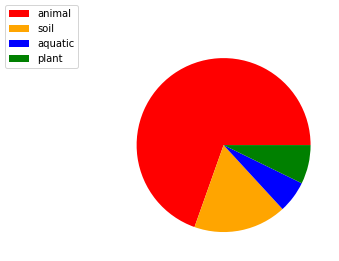

In [143]:
fig, ax = plt.subplots()
ax.pie(envdf["Background"], labels=['','','',''], colors=["red","orange","blue","green"])
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
fig.legend(loc='upper left',labels=envdf["Env"])
plt.plot()

plt.savefig("allsamples.svg",bbox_inches="tight")

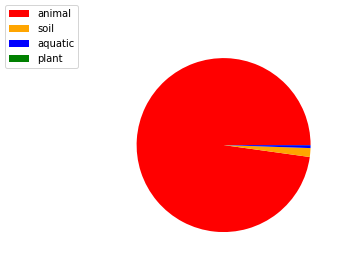

In [144]:
fig, ax = plt.subplots()
ax.pie(envdf["Theta"], labels=['','','',''], colors=["red","orange","blue","green"],)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
fig.legend(loc='upper left',labels=envdf["Env"])
plt.plot()

plt.savefig("thetasamples.svg",bbox_inches="tight")

In [59]:
#unique runs in which theta ribos where found
len(set(samples))

999

In [68]:
#potentially implement all ribos here

SRR5007456 not found
ERR2113684 not found
ERR2113684 not found


In [ ]:
#figure out how to get them into a nice table- the ones with an associated trna atleast




In [ ]:
# command to copy all files into one directory, will make the downstream processing way easier. 
#for x in */*.txt; do cp "$x" ../together/ ; done

#when in ~/Python/ribozymes/phage_samples/v4/trnascan for example

In [60]:
#lists all the files in the directory

#57 potenbtially problematic due to double files...

dicti_rf={}
for nu in range(1,61):
    filenames_filt=[]
    filenames=os.listdir("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/rnarobo_results/"+str(nu))
    for fi in filenames:
        if fi[-3:]=="txt":
            filenames_filt.append(fi)

    for filename in filenames_filt:
       with open(os.path.join("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/rnarobo_results/"+str(nu), filename), 'r') as f: # open in readonly mode
          # do your stuff
            f_l=f.readlines()
            #means at least one ribo was found
            if len(f_l)>17:
                for linea in f_l[11:-6]:
                    if linea[0]!="|":
                        #line=linea.replace(".","_")
                        line=linea.strip().split()
                        try:
                            if line[2] in dicti_rf:
                                dicti_rf[line[2]].append(int(line[1]))
                            else:
                                dicti_rf[line[2]]=[int(line[1])]
                        except: 
                            pass
                            #print("duplicated but why")




KeyboardInterrupt: 

In [96]:
len(dicti_rf)
#Yay

104264

In [32]:

#to create dicti of all trnascan files
dictif={}
for nu2 in range(1,61):
    filenames=os.listdir("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/trnascan/"+str(nu2))
    filenames_filt=[]
 
    for fi in filenames:
        if fi[-3:]=="txt":
            filenames_filt.append(fi)
    for filename in filenames_filt:
        #with open(os.path.join("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v3_T/trnascan/"+str(nu), filename), 'r') as f: # open in readonly mode
            f=open("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/trnascan/"+str(nu2)+"/"+filename, 'r')
           
          # do your stuff
            f_l=f.readlines()
         
            #means at least one ribo was found
            if len(f_l)>1:
                for line in f_l[3:]:
                #create a dictionary with seq name as key and the starting position as value
                    line=line.strip().split()
                    #line[0]=line[0].replace(".","_")
                    if line[0] in dictif:
                        dictif[line[0]].append(int(line[2]))
                    else:
                        dictif[line[0]]=[int(line[2])]
                    

In [194]:
line

['ERR2597466.38721', '1', '115', '43', 'Asn', 'ATT', '0', '0', '39.8']

In [33]:
matching_fake=[]
for key in dicti_rf:
    if key in dictif:
        for value in dicti_rf[key]:
            for value2 in dictif[key]:
                if value-value2 in range(-2,2):
                    matching_fake.append([key,value,value2])

In [34]:
len(matching_fake)
#yay numbero 2

10

In [ ]:
#wordclouds!!!

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(["nan","raw","association","associ","pl"])
stopwords.update(["wat","sourcetracker","altamaha","itasca","keywords","wate","ti","gsc"])

In [11]:
def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    i=225-int(font_size*1.5)
    o=225-int(font_size*1.5)
    #return "RGB("+str(o)+","+str(i)+",255)" 
    return "RGB(2,"+str(i)+",125)"

In [201]:
#Lets remove keywords with a length of under 2 characters: Only trash anyway!
for row in range(len(keyw)):
    concaten=[]
    for word in keyw[4].tolist()[row].split(sep=","):

        if len(word)>2:
            #dosomething
            concaten.append(word)
            #print(word)
    keyw.iloc[row,4]=",".join(concaten)

KeyboardInterrupt: 

In [70]:
keyw_2=keyw

keyw_2.index=ind

NameError: name 'ind' is not defined

In [18]:
keyw_2

,0,1,2,3,4,5,6,7,8
ERR844330,ERR844330.ERS699151,NaN,oral,WGS,"caspian,dental,ethnic,gradually,grassland,huma...",NaN,ERP010075,NaN,NaN
SRR107054,SRR107054.SRS001689,NaN,NaN,NaN,"coriell,homo,primate,susceptibility",NaN,SRP004073,SC,NaN
ERR906457,ERR906457.ERS742933,NaN,NaN,NaN,"embryogenesis,methylcytosine,oxidases",NaN,ERP010627,NaN,NaN
SRR12968592,SRR12968592.SRS7636286,NaN,NaN,WGS,pulsenet,NaN,SRP046387,NaN,NaN
SRR2133080,SRR2133080.SRS1015973,soil,NaN,AMPLICON,"agricultural,dosage,field,leptopsermone,microc...",NaN,SRP061834,NaN,43.702 3.551
...,...,...,...,...,...,...,...,...,...
ERR4578544,ERR4578544.ERS3544305,NaN,NaN,WGS,hgt,NaN,ERP105033,NaN,NaN
DRR239148,DRR239148.DRS148070,NaN,NaN,AMPLICON,"limnic,plant,rhizosphere,soil",NaN,DRP006343,NaN,NaN
SRR8505472,SRR8505472.SRS4306823,soil,NaN,AMPLICON,"scas,soil",NaN,SRP182879,NaN,39.09 117.06
ERR1712715,ERR1712715.ERS1381795,NaN,oral,AMPLICON,"age-related,association,degeneration,macular,o...",NaN,ERP017440,NaN,NaN


In [19]:
words=[]
for sa in samples:
    try:
        words.append(keyw_2.loc[sa,4])
    except:
        print(sa+" not found")

In [40]:
#z=tabl.getcol(19036).nonzero()
#kw=keyw.iloc[z[0],4]
wc=WordCloud(color_func=red_color_func, stopwords=stopwords,prefer_horizontal=1, min_font_size=10, max_font_size=150, relative_scaling=.4, width=1000, collocations=False,height=400, max_words=15, random_state=1, background_color="white").generate(str(words).replace("'",""))
#print(datetime.datetime.now() - begin_time)
wordcloud_svg = wc.to_svg(embed_font=True)
f = open("wordcloud_theta_red.svg","w+")
f.write(wordcloud_svg )
f.close()


In [28]:
#z=tabl.getcol(19036).nonzero()
#kw=keyw.iloc[z[0],4]
WordCloud(color_func=red_color_func, stopwords=stopwords,prefer_horizontal=1, min_font_size=10, max_font_size=150, relative_scaling=.4, width=1000, collocations=False,height=400, max_words=15, random_state=1, background_color="white").generate(str(words).replace("'","")).to_svg("wordclouds_theta_red.svg")
#print(datetime.datetime.now() - begin_time)

ModuleNotFoundError: No module named 'fontTools'

In [ ]:
#random 10000 samples as a comparison to the wordclouds

In [26]:
wgs=keyw_2[keyw_2[3]=="WGS"]

In [44]:
rnd

,0,1,2,3,4,5,6,7,8
SRR7787252,SRR7787252.SRS3739985,aquatic,NaN,WGS,"hydrothermal,hydrothermal vent,limnic,metageno...",NaN,SRP154410,NaN,NaN
ERR029032,ERR029032.ERS016004,animal,NaN,WGS,"blood,montevideo",NaN,ERP000348,NaN,NaN
ERR956224,ERR956224.ERS659518,NaN,NaN,WGS,"antibiotics (resistance),multidrug-resistant",NaN,ERP000871,NaN,NaN
SRR11860840,SRR11860840.SRS6723228,animal;human,gut,AMPLICON,"feces,fresh,human,preservation,viability",NaN,SRP265030,NaN,31.23 121.47
SRR8393297,SRR8393297.SRS1666882,NaN,NaN,WGS,NaN,NaN,SRP084434,NaN,NaN
...,...,...,...,...,...,...,...,...,...
SRR11595045,SRR11595045.SRS6523535,soil,NaN,AMPLICON,"biosolids,fungus,one-time,perturbation,soil",NaN,SRP258049,NaN,45.37 -63.26
SRR345288,SRR345288.SRS261366,plant,NaN,AMPLICON,"phyllosphere,plant,tree,tropical",NaN,SRP008247,NaN,NaN
ERR1667771,ERR1667771.ERS1379380,NaN,NaN,AMPLICON,"arctic,freshwaters,inoculation,limnic,sediment...",NaN,ERP017459,CCME,NaN
SRR12537115,SRR12537115.SRS7278519,NaN,NaN,AMPLICON,"acute,coronavirus,respiration,sars-cov,syndrom...",NaN,SRP253798,NaN,NaN


In [50]:
nonakeyw=keyw_2[~keyw_2[4].isna()]

In [53]:
#rnd=keyw_2.sample(10000)

rnd=nonakeyw.sample(10000,random_state=106)

In [20]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    i=255-int(font_size*1.5)
    o=225-int(font_size*1.5)
    #return "RGB("+str(o)+","+str(i)+",255)" 
    return "RGB(255,"+str(i)+",0)"

In [ ]:
#z=tabl.getcol(19036).nonzero()
#kw=keyw.iloc[z[0],4]
wc2=WordCloud(color_func=red_color_func, stopwords=stopwords,prefer_horizontal=1, min_font_size=10, max_font_size=150, relative_scaling=.4, width=1000, collocations=False,height=400, max_words=15, random_state=1, background_color="white").generate(",".join(rnd[4].values))
#print(datetime.datetime.now() - begin_time)

wordcloud_svg2 = wc2.to_svg(embed_font=True)
f = open("wordcloud_random.svg","w+")
f.write(wordcloud_svg2 )
f.close()

In [43]:
#lets check how many of the samples where actually found

from os.path import exists

In [ ]:
count=0
noncount=0
existing_files=[]
f=open("../wgs_sample_paths.txt")
fl=f.readlines()
for line in fl:
    if exists(line.strip()):
        count+=1
        existing_files.append(line.strip().split("/")[-1])
    else:
        noncount+=1

In [52]:
runnames=[]
for file in existing_files:
    runnames.append(file.split(".")[0])

In [56]:
#number of analyzed runs
len(set(runnames))

469049

In [54]:
runnames_str=",".join(runnames)

In [55]:
f_names=open("analyzed_runs.txt","w")
f_names.write(runnames_str)
f_names.close()

In [262]:
#quickly create graphs for presentation about old false positive

numbers=[4668,3565,3307,4715]
char=["C","G","A","T"]

<BarContainer object of 4 artists>

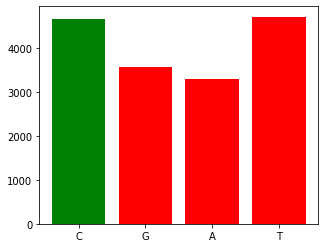

In [272]:
plt.bar(range(4),numbers,tick_label=char,color=("green","red","red","red"))


In [280]:
df1str=ff.to_csv(sep="\t",index=False)
f= open("all_WGS_ribo_trna_v2.csv","w+")
f.write(df1str)
f.close()